In [2]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [7]:
# Step 2: Load the Dataset
ecommerce_customers_ds = pd.read_csv('ecommerce-customers.csv')

In [8]:
# Step 3: Initial Data Exploration
# Check the first few rows of each dataset
print("Orders Dataset Shape:", ecommerce_customers_ds.shape)
ecommerce_customers_ds.head()

# Check basic information about the dataset
ecommerce_customers_ds.info()

# Check for missing values
ecommerce_customers_ds.isnull().sum()

Orders Dataset Shape: (500, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [17]:
# Step 4: Define Target Variable and Features

# Target variable (y) - what we want to predict
y = ecommerce_customers_ds['Yearly Amount Spent']

# Features (X) - automatically select only numeric columns
# Drop the target variable from features and keep only numeric columns
X = ecommerce_customers_ds.select_dtypes(include=['float64', 'int64']).drop('Yearly Amount Spent', axis=1)
print("X:", X)
print("y:", y)

X:      Avg. Session Length  Time on App  Time on Website  Length of Membership
0              34.497268    12.655651        39.577668              4.082621
1              31.926272    11.109461        37.268959              2.664034
2              33.000915    11.330278        37.110597              4.104543
3              34.305557    13.717514        36.721283              3.120179
4              33.330673    12.795189        37.536653              4.446308
..                   ...          ...              ...                   ...
495            33.237660    13.566160        36.417985              3.746573
496            34.702529    11.695736        37.190268              3.576526
497            32.646777    11.499409        38.332576              4.958264
498            33.322501    12.391423        36.840086              2.336485
499            33.715981    12.418808        35.771016              2.735160

[500 rows x 4 columns]
y: 0      587.951054
1      392.204933
2      487

Model Performance:

Training Metrics:
R² Score: 0.9854
RMSE: $9.79

Testing Metrics:
R² Score: 0.9778
RMSE: $10.48

Feature Coefficients:
                Feature  Coefficient
3  Length of Membership    63.543211
1           Time on App    38.703501
0   Avg. Session Length    25.250381
2       Time on Website     0.315469


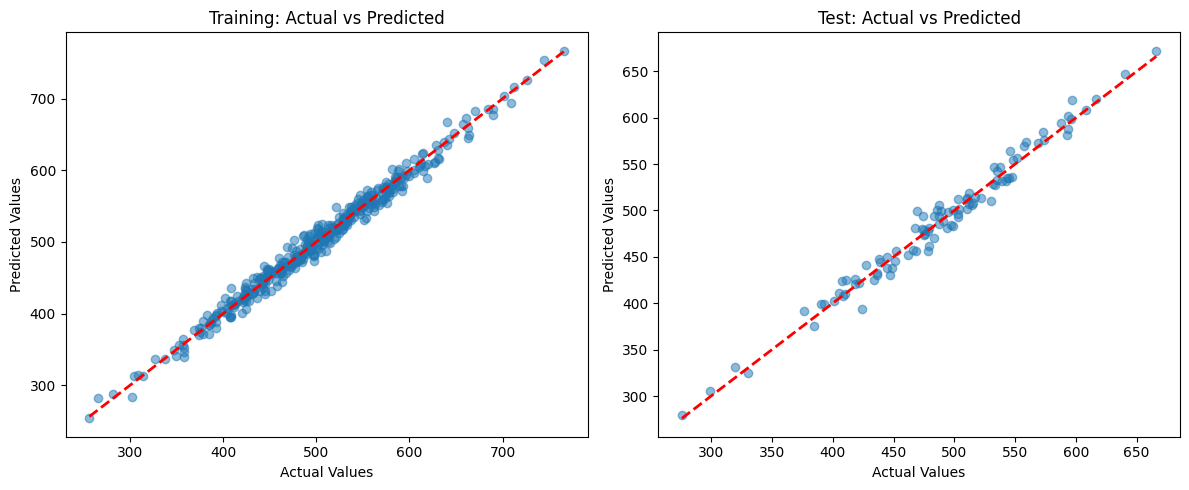

In [28]:
# Step 5: Split Data and Train Linear Regression Model

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,  # 20% for testing
                                                    random_state=42) # for reproducibility

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Now train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 3. Make predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# 4. Evaluate the model
# Training metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

# Testing metrics
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

# 5. Print the results
print("Model Performance:")
print("\nTraining Metrics:")
print(f"R² Score: {train_r2:.4f}")
print(f"RMSE: ${train_rmse:.2f}")

print("\nTesting Metrics:")
print(f"R² Score: {test_r2:.4f}")
print(f"RMSE: ${test_rmse:.2f}")

# 6. Print feature coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print("\nFeature Coefficients:")
print(coefficients.sort_values(by='Coefficient', ascending=False))

# 7. Visualize results
plt.figure(figsize=(12, 5))

# Training set visualization
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Training: Actual vs Predicted')

# Test set visualization
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Test: Actual vs Predicted')

plt.tight_layout()
plt.show()